# KNN

In [2]:
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

from helpers import plot_confusion_matrices

In [3]:
# File paths for the pickle files
x_train_path = 'data/X_train.pkl'
x_test_path = 'data/X_test.pkl'
y_train_path = 'data/y_train.pkl'
y_test_path = 'data/y_test.pkl'

# Reading the pickle files
with open(x_train_path, 'rb') as file:
    X_train = pickle.load(file)

with open(x_test_path, 'rb') as file:
    X_test = pickle.load(file)

with open(y_train_path, 'rb') as file:
    y_train = pickle.load(file)

with open(y_test_path, 'rb') as file:
    y_test = pickle.load(file)

In [4]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [5]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predicting the labels for test set
y_pred_test = knn_model.predict(X_test)

print(f"Accuracy:{accuracy_score(y_test, y_pred_test):>10.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

Accuracy:     0.863

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       739
           1       0.73      0.84      0.78       296

    accuracy                           0.86      1035
   macro avg       0.83      0.86      0.84      1035
weighted avg       0.87      0.86      0.87      1035



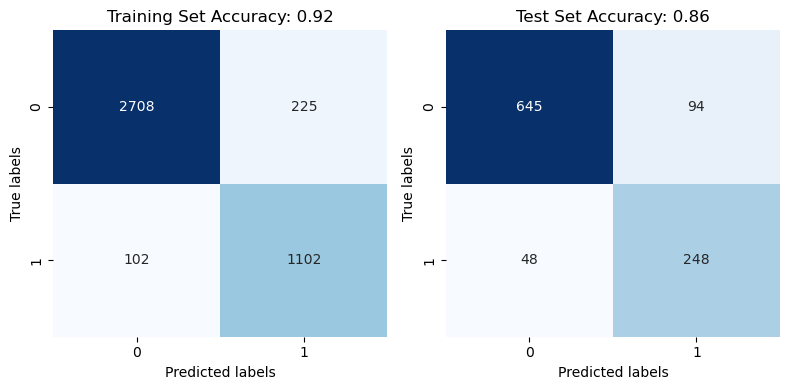

In [6]:
y_pred_train = knn_model.predict(X_train)

plot_confusion_matrices(y_train, y_pred_train, y_test, y_pred_test)

In [7]:
external_test_path = 'data/external_test.pkl'
with open(external_test_path, 'rb') as file:
    ex_test = pickle.load(file)

y_pred_ex_test = knn_model.predict(ex_test)
print(y_pred_ex_test)
#output : [1 1 1] = all three emails classified as spam even the obvious non-spam.

[1 1 1]
